In [1]:
from __future__ import print_function
import sdm as sdmlib
from sdm import utils
from scipy.stats import binom

* d = distance to the target
* h = number of activated hardlocations
* s = total stored bitstrings
* H = number of hardlocations
* w = number of times the target bitstring has been written

In [13]:
_phi_fn_cache = {}

In [14]:
def phi_fn(n, H, r, d, steps=2**9):
    key = (n, H, r, d, steps)
    if key in _phi_fn_cache:
        return _phi_fn_cache[key]
    v = []
    for _ in range(steps):
        bs1 = sdmlib.Bitstring.init_random(n)
        bs2 = bs1.copy()
        bs2.flip_random_bits(d)
        selected1 = address_space.scan_thread2(bs1, r)
        selected2 = address_space.scan_thread2(bs2, r)
        x = len(set(selected1) & set(selected2))
        v.append(x)
    mu = 1.0*sum(v)/len(v)
    _phi_fn_cache[key] = mu
    return mu

In [15]:
def prob_wrong_bit0(h, H, s, w, d, phi, theta):
    x = 1.0*s*h*h/(2*H)
    return 1 - binom.cdf(x, theta, 0.5)

In [16]:
def prob_wrong_bit1(h, H, s, w, d, phi, theta):
    x = s*h*h/(2*H)-w*phi
    return binom.cdf(x, theta, 0.5)

In [17]:
def prob_wrong(n, h, H, s, w, d):
    phi = phi_fn(n, H, r, d)
    theta = 1.0*s*h*h/H - w*phi
    p0 = prob_wrong_bit0(h, H, s, w, d, phi, theta)
    p1 = prob_wrong_bit1(h, H, s, w, d, phi, theta)
    return (p0+p1)/2.0

In [18]:
# number of dimensions of the memory
n = 256

# number of hard locations
H = 2**20


r = 104  # THIS IS THE ONE TO FIX

# number of random writes
s = 2**10 * 10
w = 1


In [19]:
p = utils.calculate_probability(n, r)
h = p*H
address_space = sdmlib.AddressSpace.init_random(n, H)

In [20]:
distances = list(range(32, 32 + n//2))
y_values = []
err_values = []
for d in distances:
    print('Calculating for d={}... '.format(d), end='')
    y = prob_wrong(n=n, h=h, H=H, s=s, w=w, d=d)
    err = abs(y - 1.0*d/n)
    print(y, err)
    y_values.append(y)
    err_values.append(err)

Calculating for d=1... 

/anaconda/lib/python3.6/site-packages/scipy/stats/_discrete_distns.py:56: RuntimeWarning: floating point number truncated to an integer
  vals = special.bdtr(k, n, p)


8.94512702778e-17 0.00390625
Calculating for d=2... 8.59748090371e-17 0.0078125
Calculating for d=3... 2.32599161945e-13 0.0117187499998
Calculating for d=4... 2.0259144529e-13 0.0156249999998
Calculating for d=5... 4.35678349004e-11 0.0195312499564
Calculating for d=6... 4.73090111359e-11 0.0234374999527
Calculating for d=7... 1.97690012636e-09 0.0273437480231
Calculating for d=8... 1.83414015645e-09 0.0312499981659
Calculating for d=9... 3.73974780226e-08 0.0351562126025
Calculating for d=10... 3.61366032813e-08 0.0390624638634
Calculating for d=11... 3.99729267899e-07 0.0429683502707
Calculating for d=12... 3.99729267899e-07 0.0468746002707
Calculating for d=13... 2.55184279429e-06 0.0507786981572
Calculating for d=14... 2.62752585091e-06 0.0546848724741
Calculating for d=15... 1.30715761721e-05 0.0585806784238
Calculating for d=16... 1.30715761714e-05 0.0624869284238
Calculating for d=17... 5.0876291465e-05 0.0663553737085
Calculating for d=18... 5.21727057261e-05 0.0702603272943
C

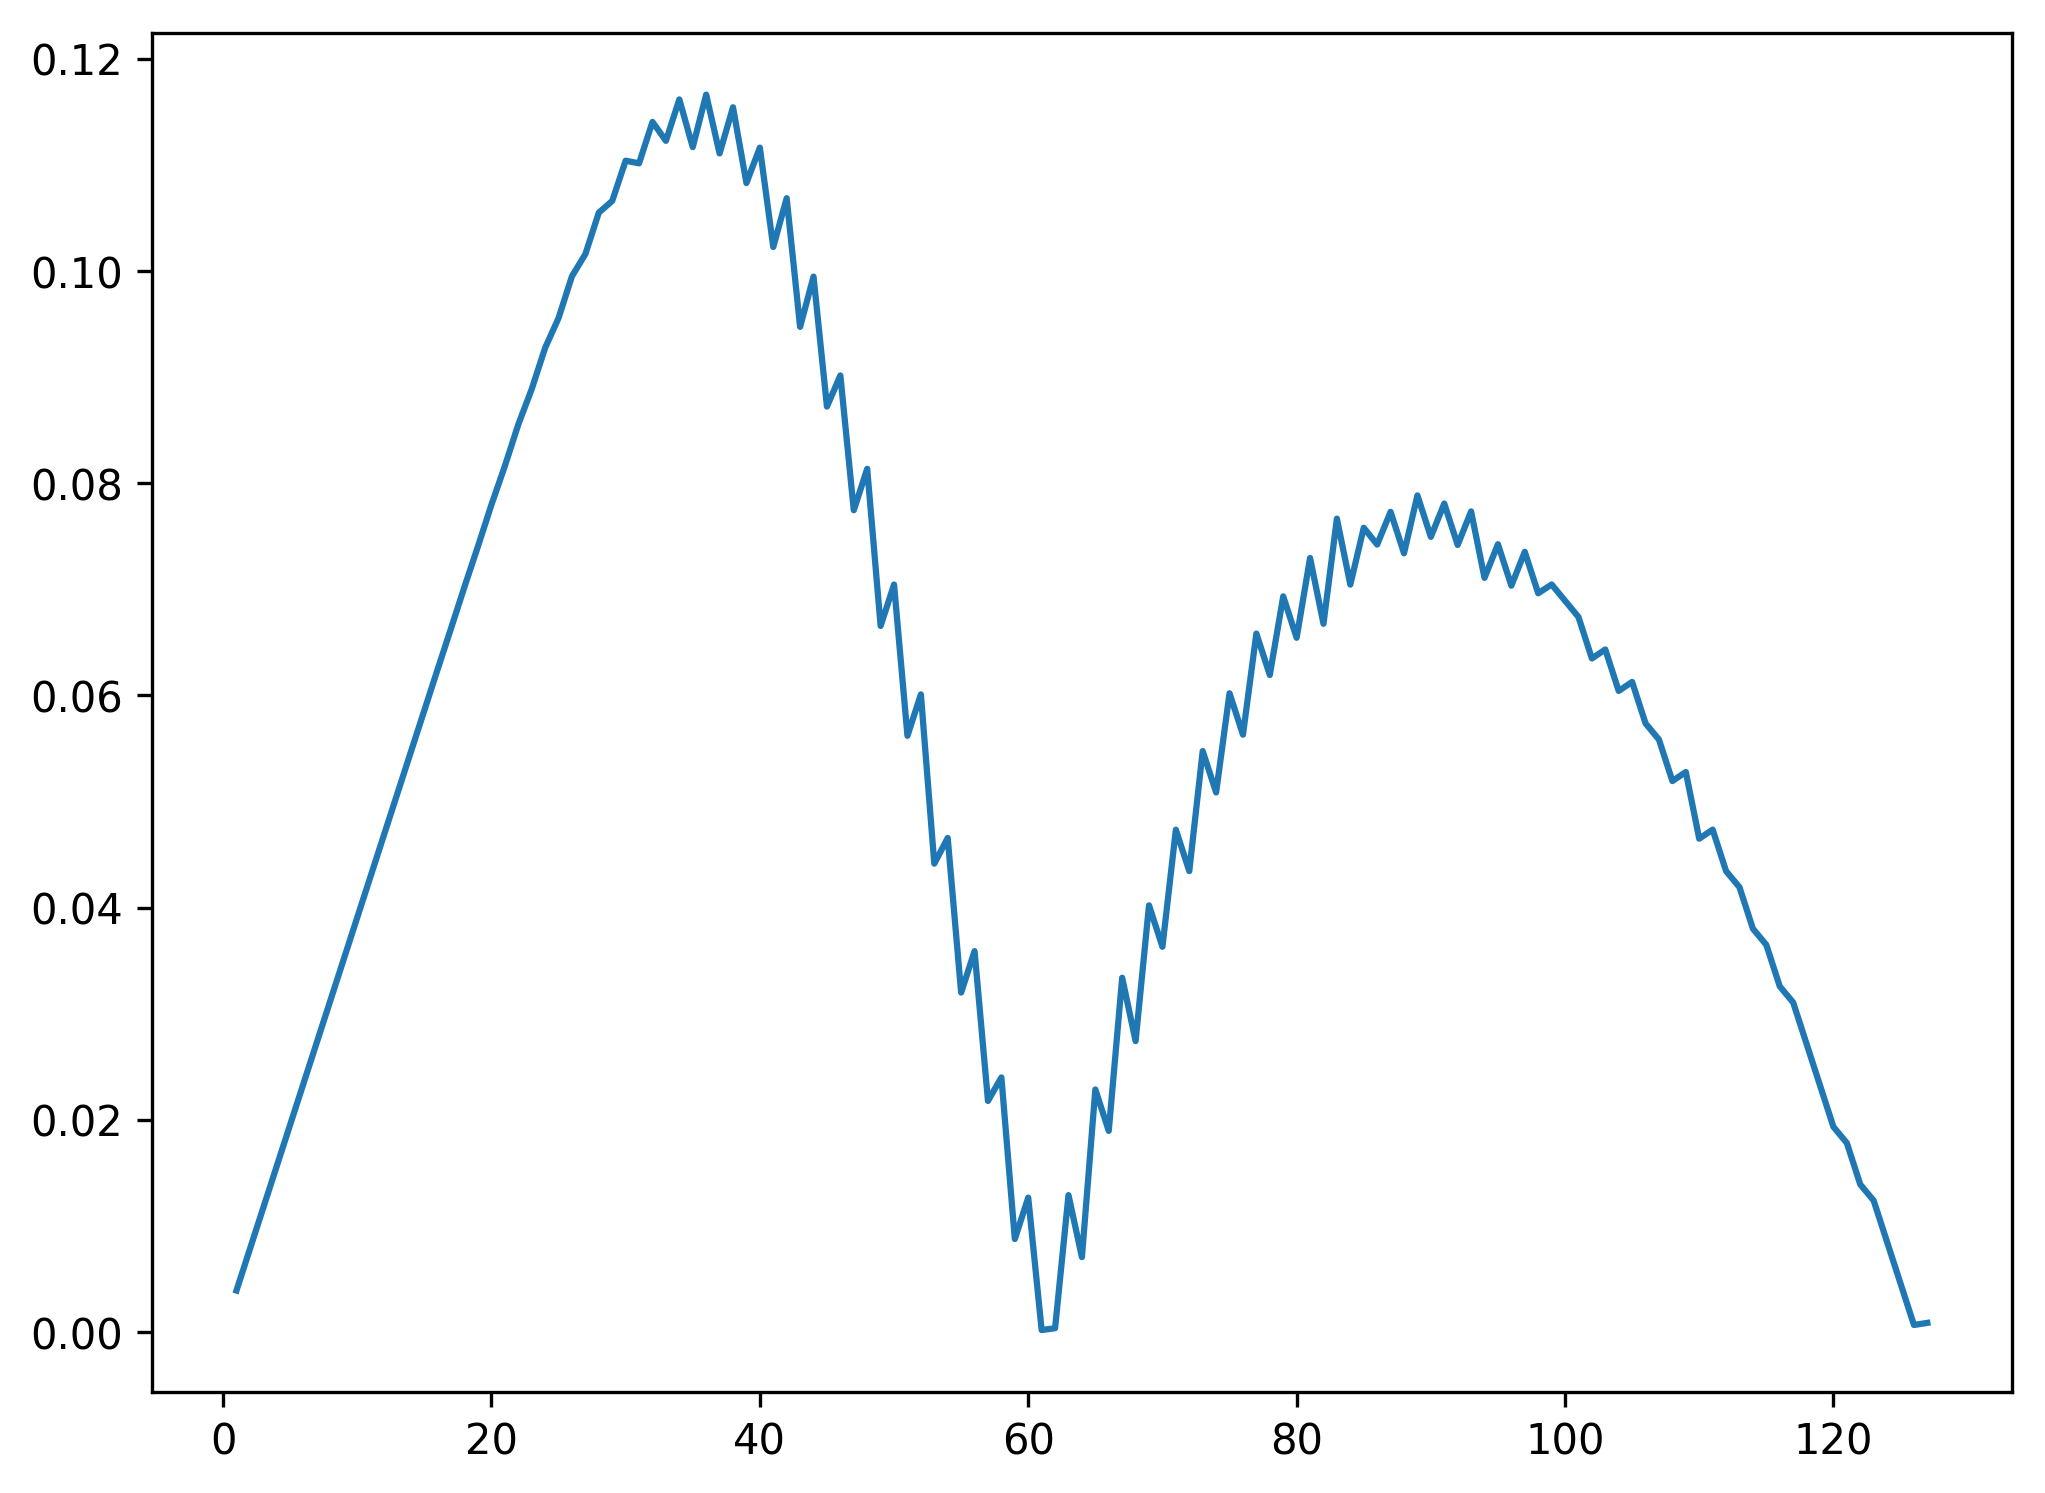

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=300)
plt.plot(distances, err_values)
plt.show()